In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os, math
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import table
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)
np.random.seed(0)

%matplotlib inline


# UTILITY OBJECTS

In [2]:
subsample_countries = ["KOR","GBR","ESP","JPN","CAN","USA","MEX","DEU","ITA","CHE","SWE","FRA"]

In [3]:
def grangers_causation_matrix(data, countries, maxlag):    
    """
    OUTPUT: 
        Row - Response Variable
        Column - Predictor
        Cells - P-Value
    """
    output = pd.DataFrame(np.zeros((len(countries), len(countries))), columns=countries, index=countries)
    
    for c in countries:
        for r in countries:
            test_result = grangercausalitytests(data[[r, c]], maxlag= maxlag, verbose=False)
            p_value = round(test_result[maxlag][0]['ssr_chi2test'][1],2) 
            output.loc[r, c] = p_value
    return output

In [4]:
def plot_granger_matrices(data, name):
    fig, axs = plt.subplots(3, 3, figsize = (25, 22))

    for lag in range(1,10):
        causation_matrix = grangers_causation_matrix(data[subsample_countries], countries = subsample_countries, maxlag=lag) 
        sns.heatmap(causation_matrix, annot=True, center=0, cmap = sns.color_palette("coolwarm", 7),ax = axs[(lag-1)/3, (lag-1)%3])
        axs[(lag-1)/3, (lag-1)%3].set_title("{} Lag".format(lag))
    plt.savefig('graphs/Granger_Causality_Heatmap_{}.png'.format(name))

In [5]:
def save_result(result, name):
    beginningtex = """\\documentclass{report}
    \\usepackage{booktabs}
    \\begin{document}"""
    endtex = "\end{document}"
    f = open('tables/VAR_Information_Criteria_{}.tex'.format(name), 'w')
    f.write(beginningtex)
    f.write(result.summary().as_latex_tabular())
    f.write(endtex)
    f.close()

# LOAD DATASET

In [8]:
Q5F1 = pd.read_csv("../data/gdp QF1/5.csv", index_col=0)
Q50F1 = pd.read_csv("../data/gdp QF1/50.csv", index_col=0)
Q5F4 = pd.read_csv("../data/gdp QF4/5.csv", index_col=0)
Q50F4 = pd.read_csv("../data/gdp QF4/50.csv", index_col=0)

# GRANGER CAUSALITY ANALYSIS TO CHOOSE OPTIMUM NUMBER OF LAGS

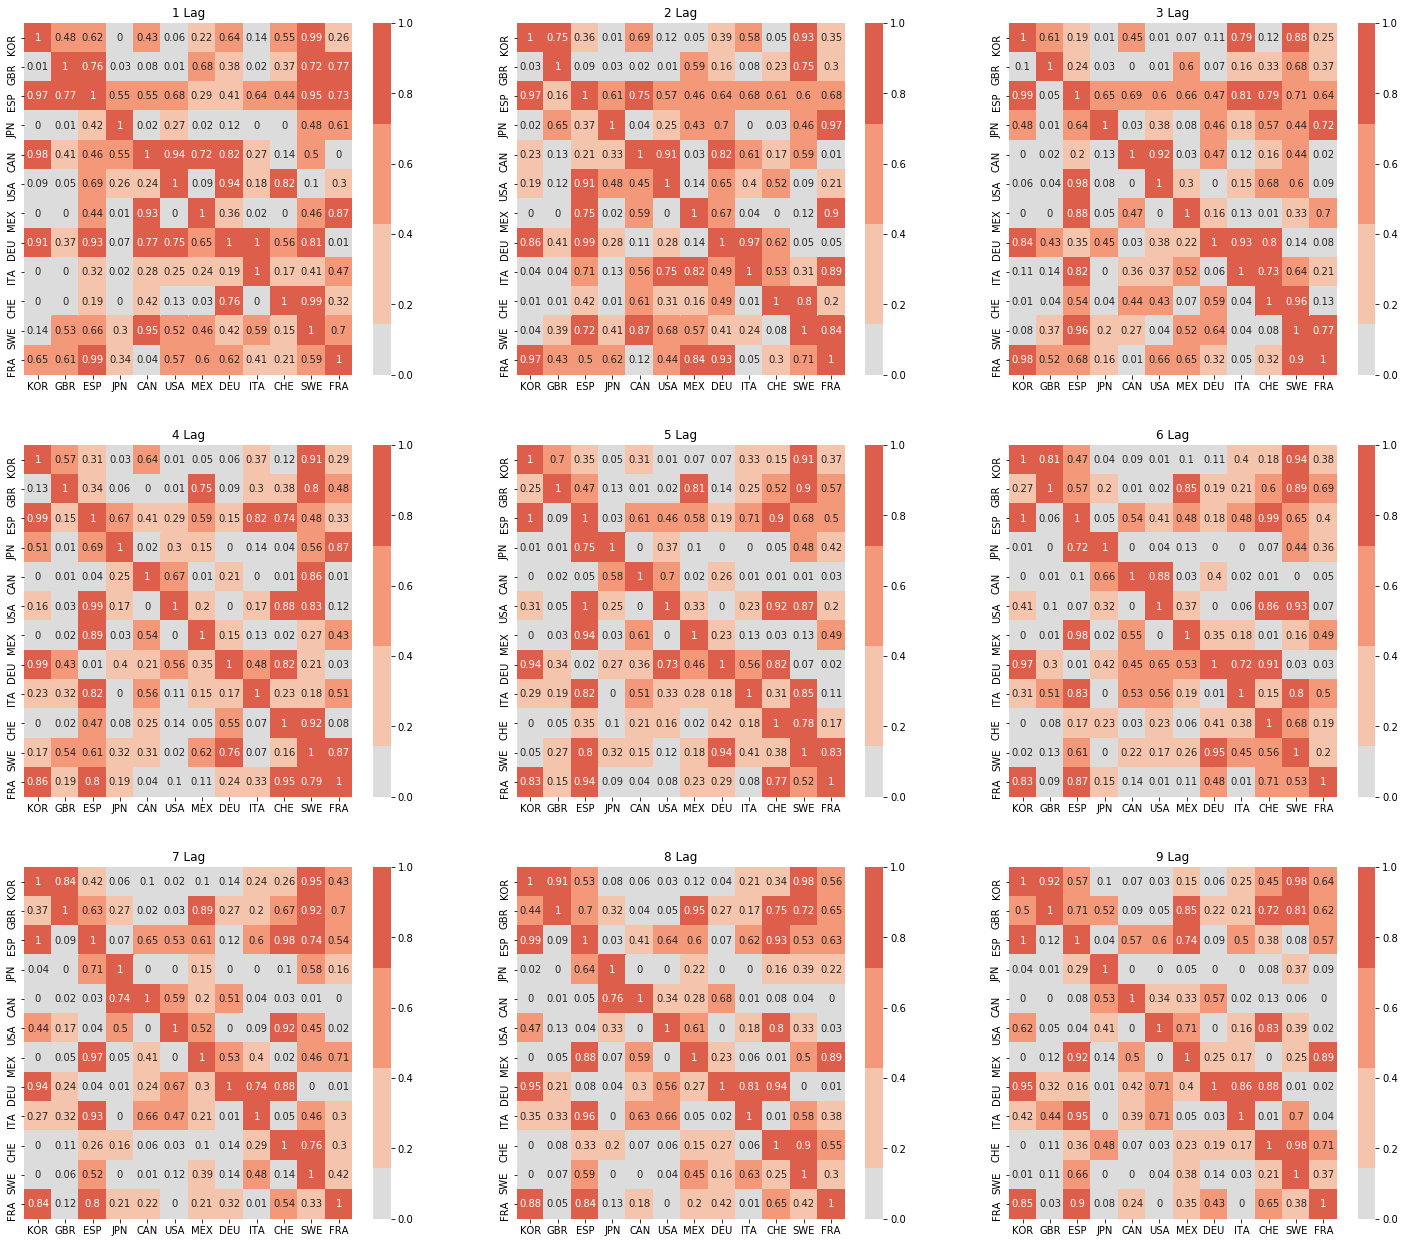

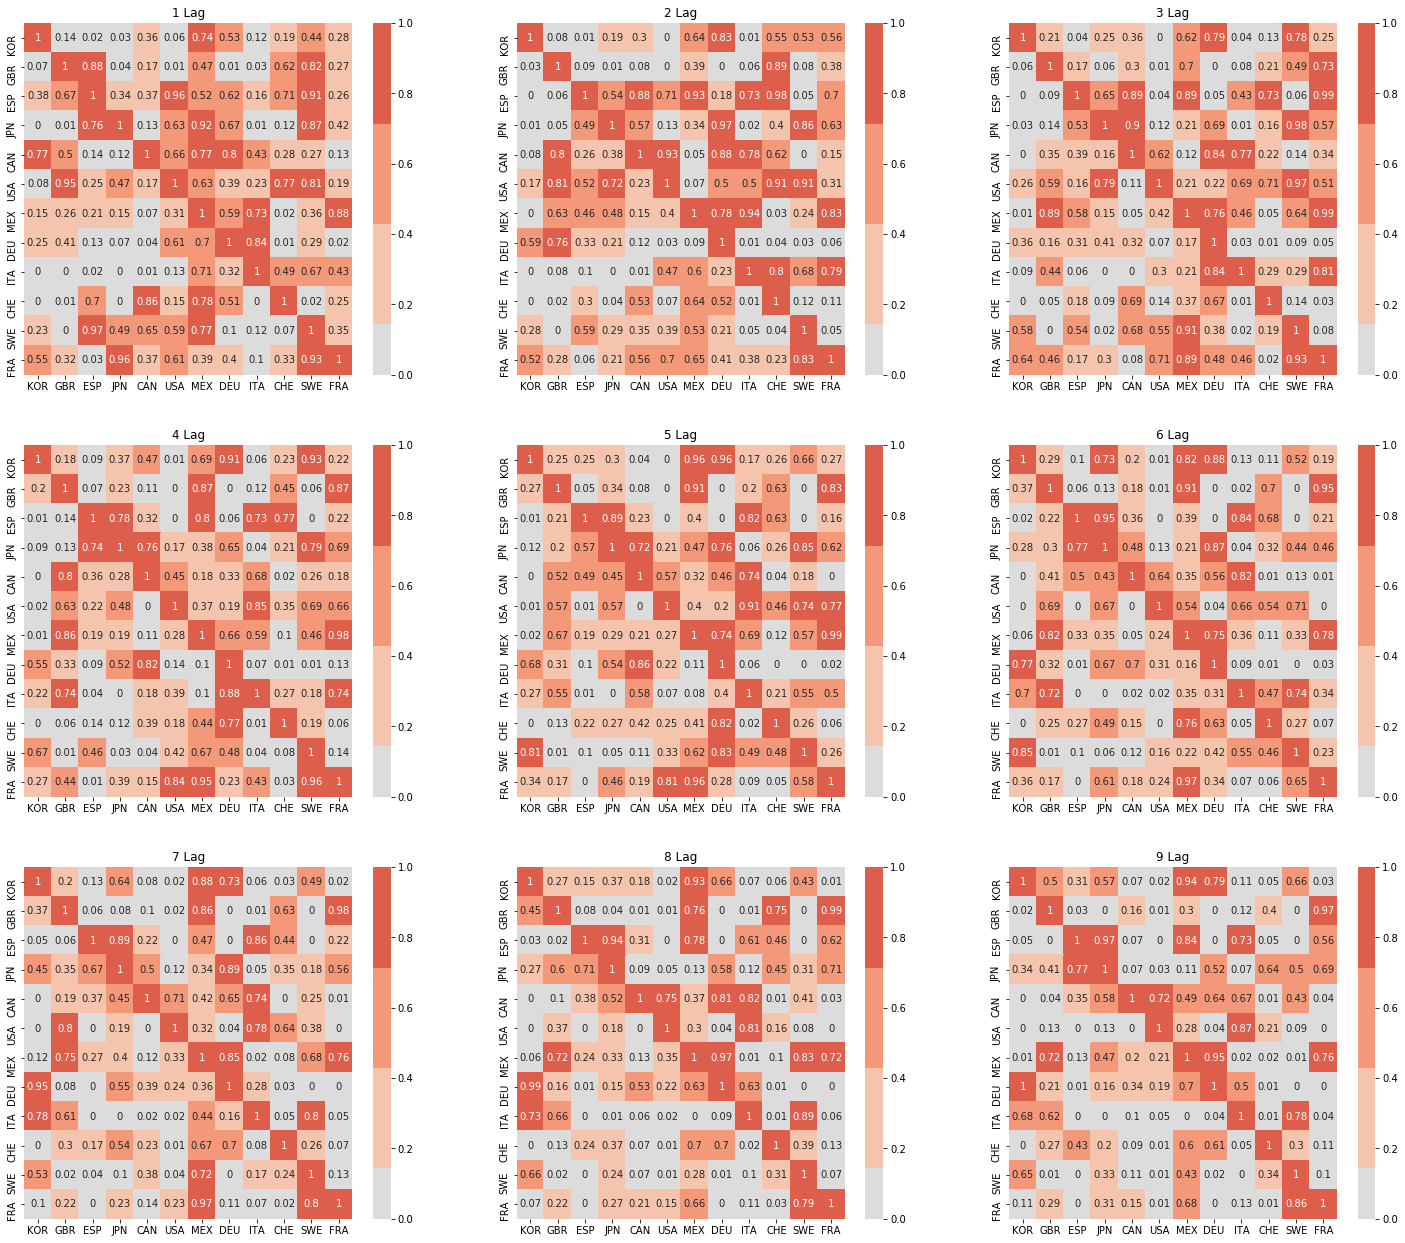

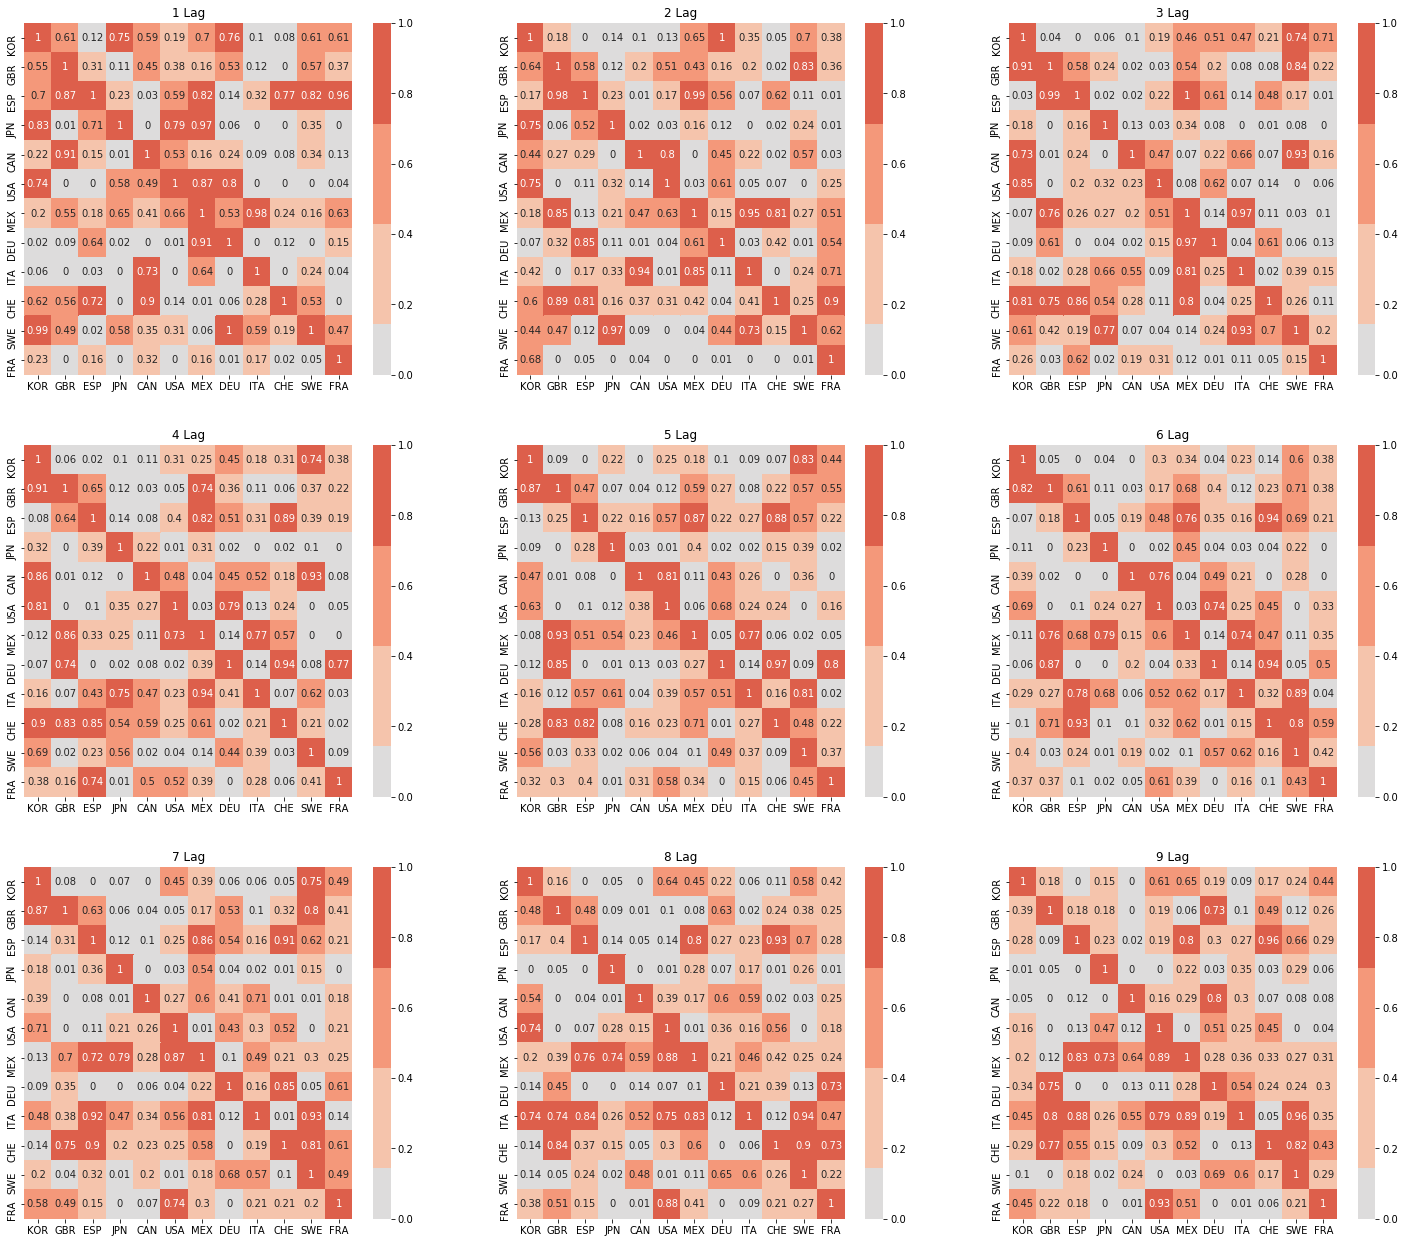

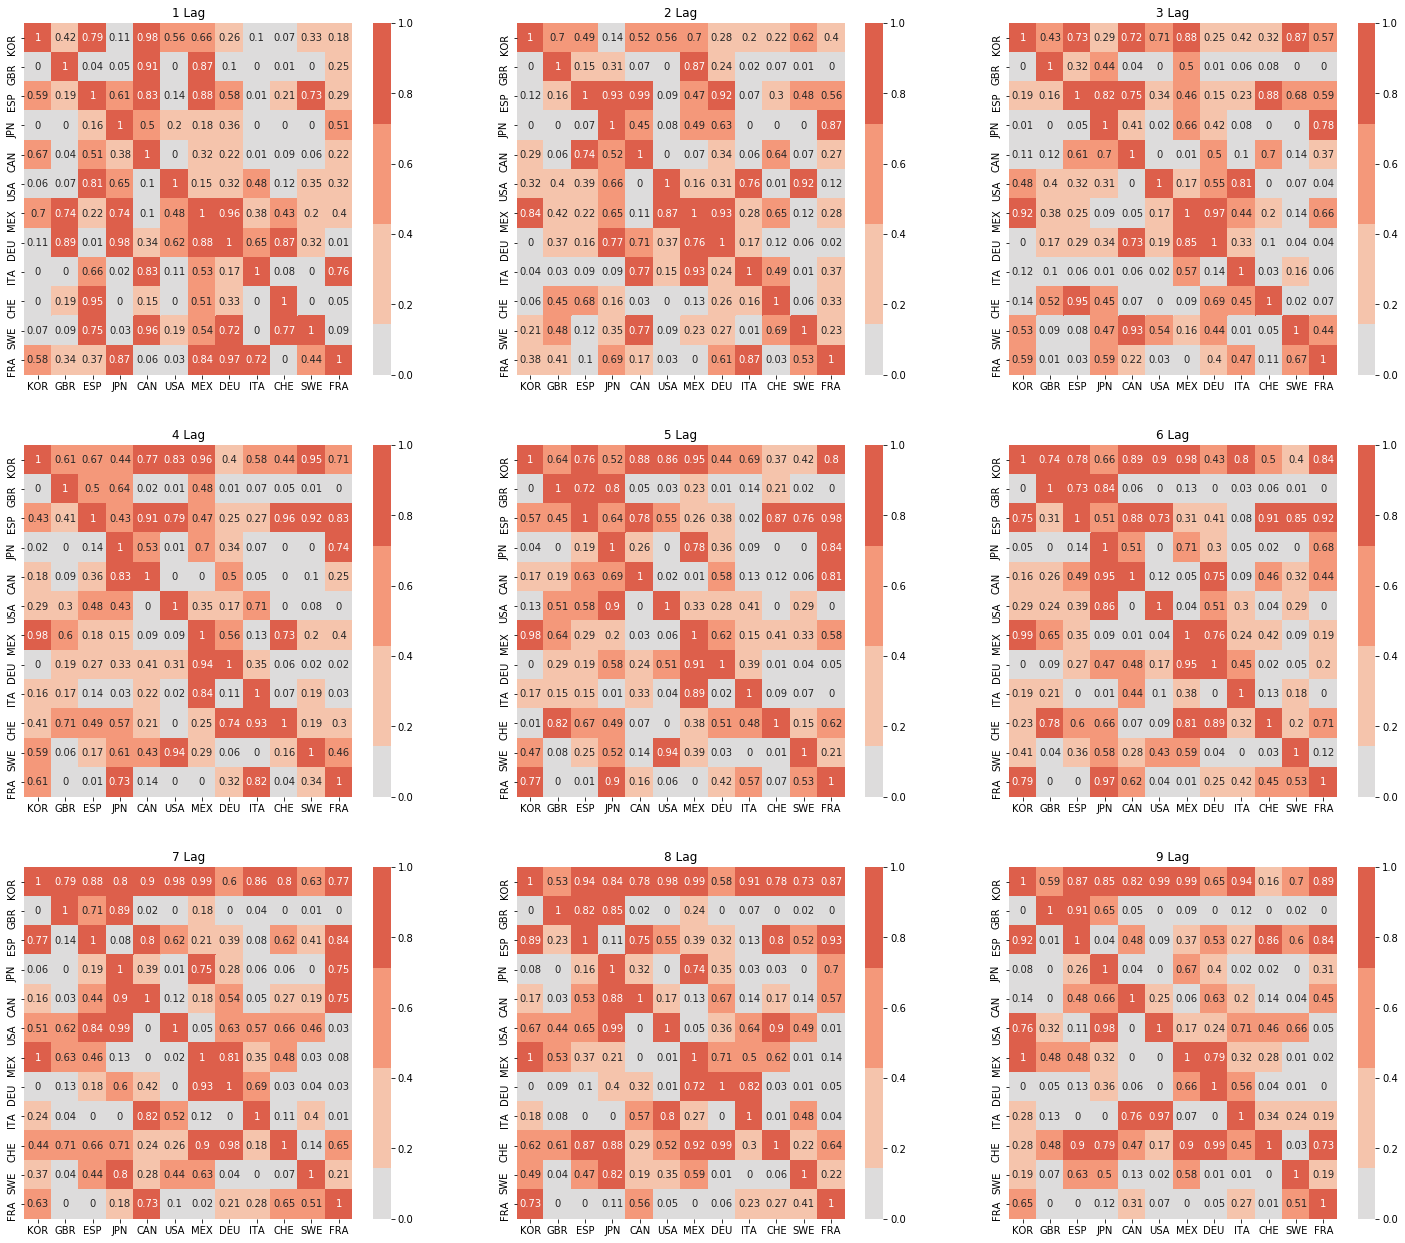

In [25]:
plot_granger_matrices(Q5F1, 'Q5F1')
plot_granger_matrices(Q50F1, 'Q50F1')
plot_granger_matrices(Q5F4, 'Q5F4')
plot_granger_matrices(Q50F4, 'Q50F4')

# INFORMATION CRITERION FOR VAR

In [26]:
summaries = []
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).select_order(maxlags=9)
    save_result(model, name)
    
    summary = pd.read_html(model.summary().as_html(), header=0, index_col=0)[0].T
    summary = pd.concat([summary], keys=['{}th Quantile, {} Period Ahead'.format(name[1:-2], name[-1])])
    summaries.append(summary)
    
pd.concat(summaries).round(2)
f = open("tables/{}.txt".format('Information Criterion for VAR'),"w") 
pd.concat(summaries).round(4).to_latex(buf = f, column_format = 'l|r|r|r|r|r|r|r|r|r|r|r|r|r|r') 
f.close()


# VAR MODEL FIT RESULTS

In [24]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(2)
    
    print "#"*50, '\n','{} Summary Result '.format(name),'\n',"#"*50, '\n'
    print model.summary()

################################################## 
Q5F1 Summary Result  
################################################## 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jun, 2020
Time:                     18:51:08
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -25.0892
Nobs:                     134.000    HQIC:                  -28.9405
Log likelihood:           134.001    FPE:                2.03873e-14
AIC:                     -31.5769    Det(Omega_mle):     2.61729e-15
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -2.309124         0.750142           -3.078           0.002
L1.KOR         0.509007         0.102

################################################## 
Q50F1 Summary Result  
################################################## 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jun, 2020
Time:                     18:51:08
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -34.1888
Nobs:                     134.000    HQIC:                  -38.0401
Log likelihood:           743.672    FPE:                2.27755e-18
AIC:                     -40.6765    Det(Omega_mle):     2.92389e-19
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.023640         0.044464            0.532           0.595
L1.KOR         0.631144         0.09

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jun, 2020
Time:                     18:51:08
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -30.6501
Nobs:                     134.000    HQIC:                  -34.5014
Log likelihood:           506.578    FPE:                7.83998e-17
AIC:                     -37.1378    Det(Omega_mle):     1.00648e-17
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.336642         0.915363            0.368           0.713
L1.KOR         0.560444         0.098222            5.706           0.000
L1.GBR        -0.018771         0.170328           -0.110           0.912
L1.ESP        -0

In [28]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(4)

    print "#"*50, '\n','{} Summary Result'.format(name),'\n',"#"*50, '\n'
    print model.summary()


################################################## 
Q5F1 Summary Result 
################################################## 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jun, 2020
Time:                     09:29:45
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -20.7394
Nobs:                     132.000    HQIC:                  -28.3628
Log likelihood:           556.747    FPE:                4.07379e-15
AIC:                     -33.5810    Det(Omega_mle):     9.22026e-17
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -2.269558         1.108753           -2.047           0.041
L1.KOR         0.476971         0.1260

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jun, 2020
Time:                     09:29:45
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -28.5138
Nobs:                     132.000    HQIC:                  -36.1371
Log likelihood:           1069.85    FPE:                1.71252e-18
AIC:                     -41.3554    Det(Omega_mle):     3.87597e-20
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.020567         0.059394           -0.346           0.729
L1.KOR         0.655211         0.115106            5.692           0.000
L1.GBR         0.117255         0.198785            0.590           0.555
L1.ESP         0

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jun, 2020
Time:                     09:29:46
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -40.0943
Nobs:                     132.000    HQIC:                  -47.7177
Log likelihood:           1834.17    FPE:                1.60053e-23
AIC:                     -52.9359    Det(Omega_mle):     3.62249e-25
--------------------------------------------------------------------
Results for equation KOR
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.023514         0.071781           -0.328           0.743
L1.KOR         0.674056         0.174328            3.867           0.000
L1.GBR         0.382766         0.279614            1.369           0.171
L1.ESP        -0

# WHITENESS TEST RESULT

In [29]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(3)
    
    print "#"*50, '\n','{} Summary Result '.format(name),'\n',"#"*50, '\n'
    print model.test_whiteness(4).summary()

################################################## 
Q5F1 Summary Result  
################################################## 

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 4 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         385.6          173.0   0.000 144
-----------------------------------------
################################################## 
Q50F1 Summary Result  
################################################## 

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 4 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         347.5          173.0   0.000 144
-----------------------------------------
################################################## 
Q5F4 Summary Result  
#########################################

In [17]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(4)

    print "#"*50, '\n','{} Summary Result'.format(name),'\n',"#"*50, '\n'
    print model.test_whiteness().summary()

################################################## 
Q5F1 Summary Result 
################################################## 

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 10 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1184.          933.5   0.000 864
-----------------------------------------
################################################## 
Q50F1 Summary Result 
################################################## 

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 10 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1220.          933.5   0.000 864
-----------------------------------------
################################################## 
Q5F4 Summary Result 
##########################################

# NORMALITY TEST

In [31]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(1)
    
    print "#"*50, '\n','{} Summary Result '.format(name),'\n',"#"*50, '\n'
    print model.test_normality().summary()

################################################## 
Q5F1 Summary Result  
################################################## 

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         8274.          36.42   0.000 24
----------------------------------------
################################################## 
Q50F1 Summary Result  
################################################## 

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.085e+04          36.42   0.000 24
----------------------------------------
################################################## 
Q5F4 Summary Result  
################################################## 

normality (ske

In [32]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(4)

    print "#"*50, '\n','{} Summary Result'.format(name),'\n',"#"*50, '\n'
    print model.test_normality().summary()

################################################## 
Q5F1 Summary Result 
################################################## 

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         1140.          36.42   0.000 24
----------------------------------------
################################################## 
Q50F1 Summary Result 
################################################## 

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         961.3          36.42   0.000 24
----------------------------------------
################################################## 
Q5F4 Summary Result 
################################################## 

normality (skew a

# GRANGER CAUSALITY TEST

In [33]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(1)
    
    print "#"*50, '\n','{} Summary Result '.format(name),'\n',"#"*50, '\n'
    print model.test_causality(subsample_countries,subsample_countries).summary()

################################################## 
Q5F1 Summary Result  
################################################## 

Granger causality F-test. H_0: %s do not Granger-cause [KOR, GBR, ESP, JPN, CAN, USA, MEX, DEU, ITA, CHE, SWE, FRA]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
         19.02          1.214   0.000 (144, 1464)
-------------------------------------------------
################################################## 
Q50F1 Summary Result  
################################################## 

Granger causality F-test. H_0: %s do not Granger-cause [KOR, GBR, ESP, JPN, CAN, USA, MEX, DEU, ITA, CHE, SWE, FRA]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
         9.684          1.214   0.000 (144, 1464)
-------------------------------------------------
#############

In [34]:
for name, forecast in zip(['Q5F1', 'Q50F1', 'Q5F4', 'Q50F4'],[Q5F1, Q50F1, Q5F4, Q50F4]):
    model = VAR(forecast[subsample_countries]).fit(4)

    print "#"*50, '\n','{} Summary Result'.format(name),'\n',"#"*50, '\n'
    print model.test_causality(subsample_countries,subsample_countries).summary()

################################################## 
Q5F1 Summary Result 
################################################## 

Granger causality F-test. H_0: %s do not Granger-cause [KOR, GBR, ESP, JPN, CAN, USA, MEX, DEU, ITA, CHE, SWE, FRA]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
         8.161          1.128   0.000 (576, 996)
------------------------------------------------
################################################## 
Q50F1 Summary Result 
################################################## 

Granger causality F-test. H_0: %s do not Granger-cause [KOR, GBR, ESP, JPN, CAN, USA, MEX, DEU, ITA, CHE, SWE, FRA]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
         4.776          1.128   0.000 (576, 996)
------------------------------------------------
#######################